# LHC Machine Learing workshop challenge
https://gitlab.cern.ch/IML-WG/IML_challenge_2018/wikis/home

Task: Regress the soft-drop mass of jets with high transverse momentum. Jets are complex physical objects, often containing a spray of particles.https://en.wikipedia.org/wiki/Jet_(particle_physics)


STEP I

In [2]:
#get the data
import numpy as np
import pandas as pd

#training data
my_array=np.load('../data/qcd.npy',encoding='bytes')

my_rec_array=my_array.view(np.recarray)

my_df=pd.DataFrame.from_records(my_rec_array)

In [ ]:
#test data, solutions not avaliable

my_test_array=np.load('../data/qcd_test.npy',encoding='bytes')

my_test_rec_array=my_test_array.view(np.recarray)

my_test_df=pd.DataFrame.from_records(my_test_rec_array)

In [3]:
my_df.columns

Index(['genjet_sd_m', 'recojet_pt', 'recojet_eta', 'recojet_phi', 'recojet_m',
       'recojet_sd_pt', 'recojet_sd_eta', 'recojet_sd_phi', 'recojet_sd_m',
       'n_constituents', 'constituents_pt', 'constituents_eta',
       'constituents_phi', 'constituents_charge', 'constituents_dxy',
       'constituents_dz', 'constituents_Eem', 'constituents_Ehad'],
      dtype='object')

In [4]:
my_df.shape #one mil training samples, 18 'features', in physics we call them variables

(1042167, 18)

these are reconstructed features, and number of constituents each jet is composed of

In [5]:
my_df.iloc[:5,0:10] #

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents
0,728.836243,7436.075195,-0.987097,-1.744650,752.937805,7434.067871,-0.987166,-1.744612,751.443054,62
1,6.285021,5093.908691,-0.492611,1.106933,166.851654,4907.403320,-0.491663,1.105769,120.999168,50
2,564.034302,2995.798096,-0.382037,1.958864,542.748535,2991.528809,-0.381463,1.959137,540.299133,42
3,615.282471,7282.272949,0.724502,2.508060,604.372070,7274.226074,0.724465,2.508207,599.379395,78
4,233.040070,4860.147949,1.160326,-0.578850,428.898621,4553.962891,1.142592,-0.581841,268.025879,86


these are raw, constituent features , each of them is an array of variable size n_constitutes

In [6]:
my_df.iloc[:2,10:] 

,constituents_pt,constituents_eta,constituents_phi,constituents_charge,constituents_dxy,constituents_dz,constituents_Eem,constituents_Ehad
0,"[0.569073, 7.12231, 0.606483, 4.66521, 4.49783...","[-0.589588, -0.723512, -0.832629, -0.738317, -...","[-1.72336, -1.45068, -2.09983, -1.45352, -1.39...","[-1.0, 0.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, ...","[0.013527, -999.0, -0.00292841, -0.000528042, ...","[-0.0222221, -999.0, -0.0476496, 0.0546329, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.93...","[0.67088, 9.07013, 0.829141, 5.99556, 6.33195,..."
1,"[1.13794, 1.71443, 0.399515, 1.43171, 8.14088,...","[-0.781574, -0.45416, -0.217684, -0.696161, -0...","[0.922307, 1.41593, 1.199, 1.11402, 1.04489, 1...","[1.0, 1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0....","[0.0180221, 0.0050095, -0.0121964, 0.0101132, ...","[-0.0339262, -0.0477318, -0.000906341, 0.00129...","[0.0, 0.0, 0.0, 0.0, 0.0, 7.50819, 0.0, 13.77,...","[1.50356, 1.8943, 0.409019, 1.79288, 8.58119, ..."


It is important to notice that the number of constituents of a single jet vary from 1 to upto 288

In [5]:
my_df.describe()

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents
count,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06
mean,1.887266e+02,5.607667e+03,-2.380226e-04,-6.366543e-04,3.422506e+02,5.361270e+03,-2.331296e-04,-6.775979e-04,2.452074e+02,5.784907e+01
std,2.669230e+02,1.342585e+03,9.566956e-01,1.813424e+00,2.276283e+02,1.336248e+03,9.565645e-01,1.813410e+00,2.438659e+02,3.024800e+01
min,-4.893482e-03,2.002432e+02,-3.038265e+00,-3.141577e+00,-1.220703e-04,1.833959e+02,-3.038052e+00,-3.141591e+00,-4.882812e-04,1.000000e+00
25%,8.103596e+00,4.894860e+03,-7.163548e-01,-1.569287e+00,1.843979e+02,4.612326e+03,-7.166641e-01,-1.569120e+00,8.982699e+01,3.400000e+01
50%,5.985435e+01,5.422534e+03,-1.072501e-03,5.291263e-04,2.750273e+02,5.202349e+03,-1.288030e-03,7.776399e-04,1.571890e+02,5.200000e+01
75%,2.722448e+02,6.163136e+03,7.166165e-01,1.567930e+00,4.329887e+02,5.934695e+03,7.168161e-01,1.567652e+00,3.034574e+02,7.600000e+01
max,3.795928e+03,2.561873e+04,2.964880e+00,3.141578e+00,4.124447e+03,2.553824e+04,2.964138e+00,3.141584e+00,4.124447e+03,2.880000e+02


The next two sections is just trying to get the data into desired format

In [6]:
fields=my_array.dtype.names

In [8]:
#del my_train_val_array
num_jets=my_rec_array.shape[0]
for field in fields:
    print(field)
    x=getattr(my_rec_array,field)
    x=np.reshape(x,[1,num_jets])
    try:
        my_train_val_array=np.concatenate((my_train_val_array,x))
    except:
        print(field)
        my_train_val_array=x
        

genjet_sd_m
genjet_sd_m
recojet_pt
recojet_eta
recojet_phi
recojet_m
recojet_sd_pt
recojet_sd_eta
recojet_sd_phi
recojet_sd_m
n_constituents
constituents_pt
constituents_eta
constituents_phi
constituents_charge
constituents_dxy
constituents_dz
constituents_Eem
constituents_Ehad


In [9]:
my_train_val_array=my_train_val_array.T
my_train_val_array.shape

(1042167, 18)

In [10]:
my_train_val_array[1]

array([6.28502082824707, 5093.90869140625, -0.4926111102104187,
       1.1069329977035522, 166.85165405273438, 4907.4033203125,
       -0.4916630983352661, 1.1057692766189575, 120.9991683959961, 50.0,
       array([  1.13794136e+00,   1.71443319e+00,   3.99515480e-01,
         1.43170857e+00,   8.14088058e+00,   6.33541679e+00,
         4.85531521e+00,   1.21996002e+01,   4.54624271e+00,
         5.06813765e+00,   2.53469777e+00,   1.59912052e+01,
         6.05698919e+00,   8.16933441e+00,   4.47165680e+00,
         1.11999741e+01,   6.27926636e+00,   4.44901514e+00,
         1.15049934e+01,   6.08486700e+00,   7.25603962e+00,
         9.61595249e+00,   4.18371916e+00,   7.20420361e+00,
         3.35404563e+00,   1.27380991e+01,   1.70533066e+01,
         8.21961117e+00,   6.77124357e+00,   3.93042898e+00,
         2.12954590e+03,   8.07260799e+00,   4.53959427e+01,
         2.22147255e+01,   2.77504158e+01,   3.18615532e+01,
         5.68692627e+01,   1.03862791e+01,   4.57387657e+01,

In [11]:
from sklearn.model_selection import train_test_split

train_array, val_array = train_test_split(my_train_val_array, test_size=0.30,random_state=2158)
train_array.shape,val_array.shape

((729516, 18), (312651, 18))

In [12]:
reco_features_train=train_array[:,0:10] #recofeatures+target
#features1[:3]
const_features_train=train_array[:,9:] #constituents
reco_features_val=val_array[:,0:10] #recofeatures+target
#features1[:3]
const_features_val=val_array[:,9:] #constituents

/Users/nabarundev/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


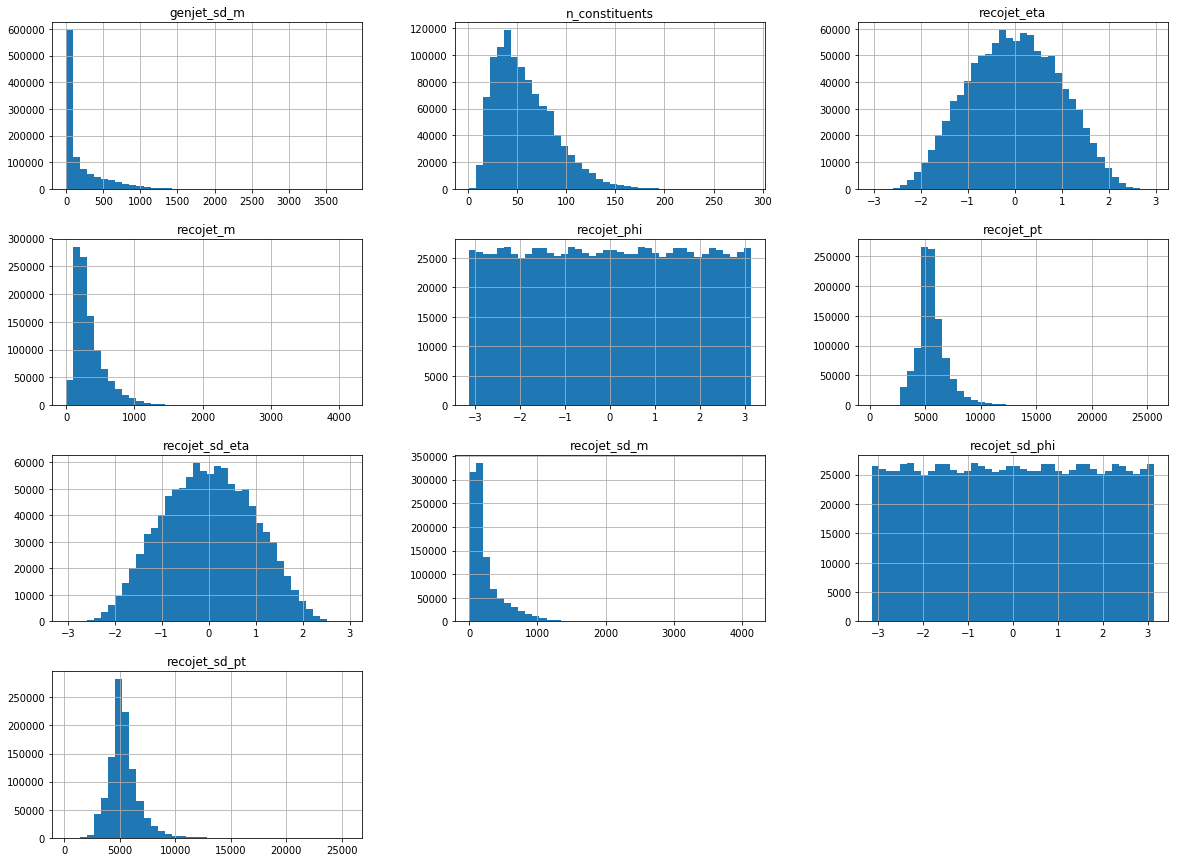

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
fig, axies = plt.subplots()
my_df.iloc[:,0:10].hist(bins=40,ax=axies)
axies.set_yscale('log')

Lets look at the distribution of number of constituents. The bulk of events have <=150 jets

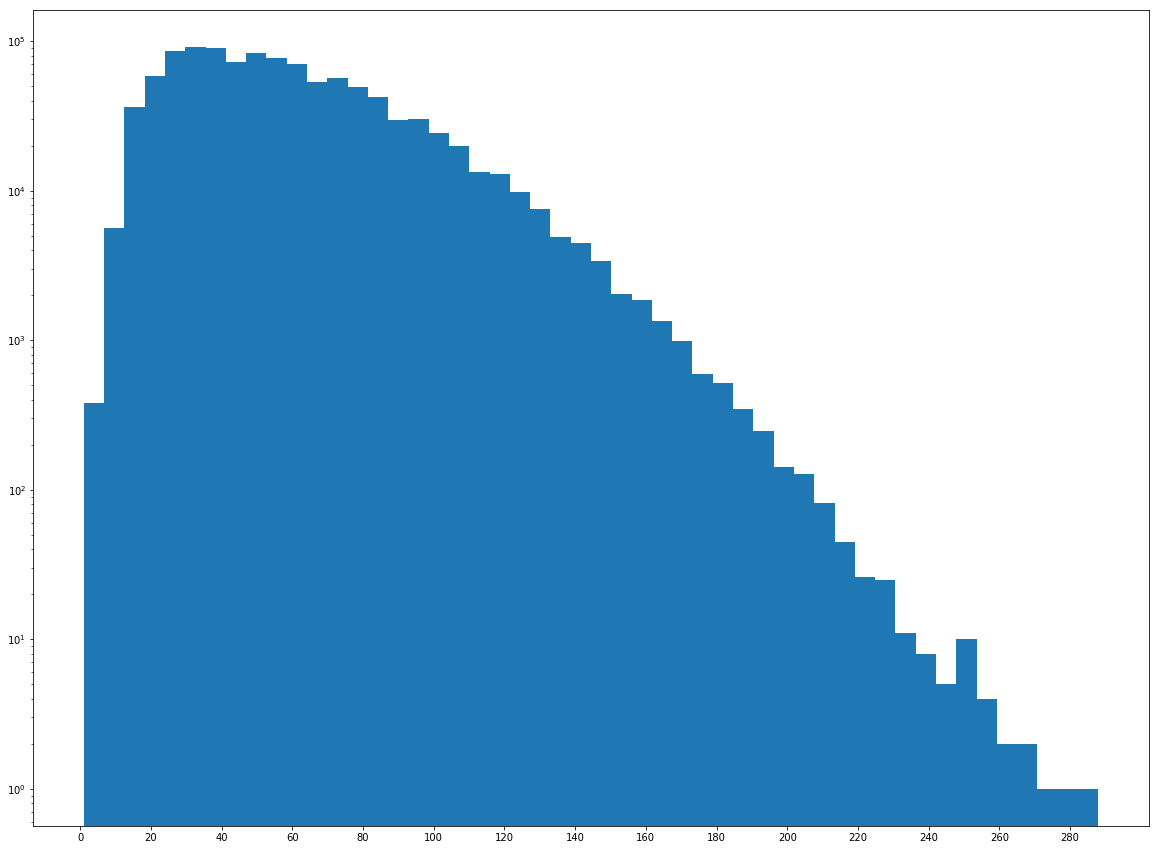

In [70]:
n_const_train=my_rec_array.n_constituents
plt.yscale('log',nonposy='clip')
plt.xticks(np.arange(0, 300, 20))
plt.hist(n_const_train,bins=50)
plt.show()


,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents
genjet_sd_m,1.000000,0.087588,0.000106,-0.000219,0.852355,0.155473,0.000103,-0.000162,0.929001,0.617594
recojet_pt,0.087588,1.000000,-0.000220,0.000105,0.269702,0.976429,-0.000223,0.000120,0.193405,0.031434
recojet_eta,0.000106,-0.000220,1.000000,0.000422,-0.001944,0.000208,0.999984,0.000507,-0.000091,-0.003479
recojet_phi,-0.000219,0.000105,0.000422,1.000000,-0.000155,0.000357,0.000423,0.998262,0.000221,-0.000087
recojet_m,0.852355,0.269702,-0.001944,-0.000155,1.000000,0.286507,-0.001943,-0.000123,0.900225,0.687131
recojet_sd_pt,0.155473,0.976429,0.000208,0.000357,0.286507,1.000000,0.000203,0.000365,0.281019,0.011800
recojet_sd_eta,0.000103,-0.000223,0.999984,0.000423,-0.001943,0.000203,1.000000,0.000507,-0.000093,-0.003467
recojet_sd_phi,-0.000162,0.000120,0.000507,0.998262,-0.000123,0.000365,0.000507,1.000000,0.000267,-0.000006
recojet_sd_m,0.929001,0.193405,-0.000091,0.000221,0.900225,0.281019,-0.000093,0.000267,1.000000,0.579984
n_constituents,0.617594,0.031434,-0.003479,-0.000087,0.687131,0.011800,-0.003467,-0.000006,0.579984,1.000000


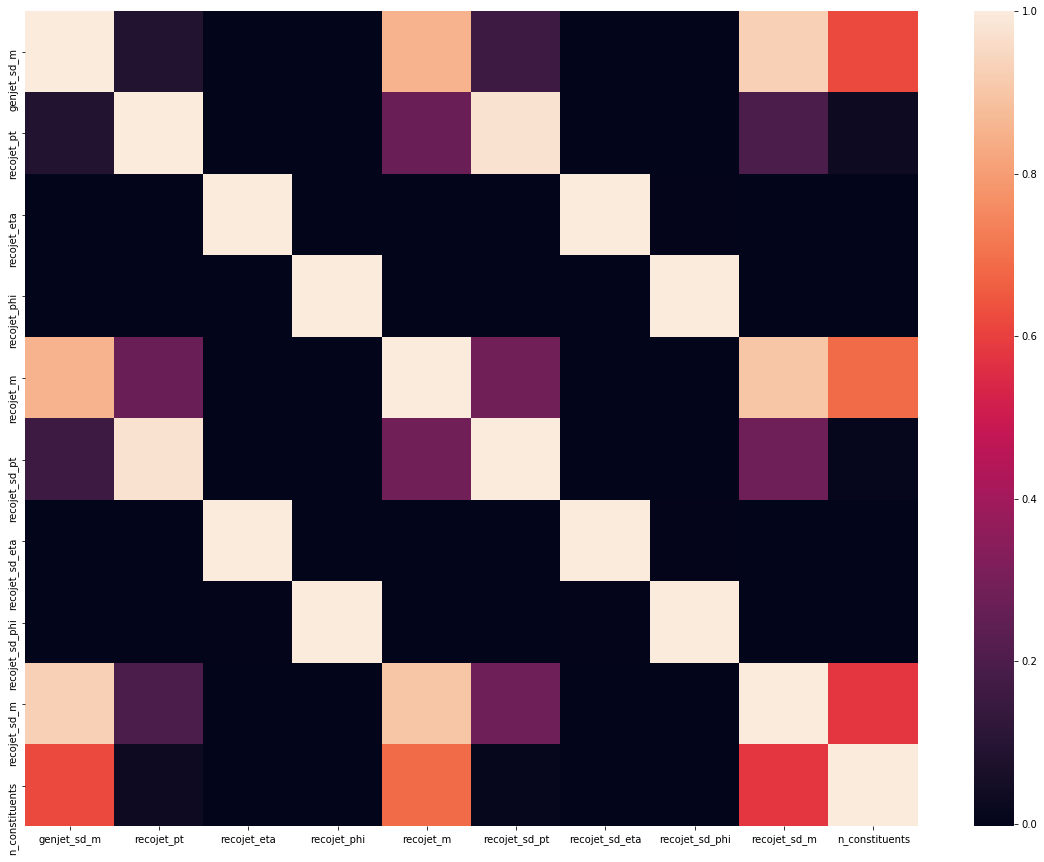

In [16]:
import seaborn as sns
corr = my_df.iloc[:,0:10].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

In [17]:
my_df.iloc[:,0:10].describe()

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents
count,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06,1.042167e+06
mean,1.887266e+02,5.607667e+03,-2.380226e-04,-6.366543e-04,3.422506e+02,5.361270e+03,-2.331296e-04,-6.775979e-04,2.452074e+02,5.784907e+01
std,2.669230e+02,1.342585e+03,9.566956e-01,1.813424e+00,2.276283e+02,1.336248e+03,9.565645e-01,1.813410e+00,2.438659e+02,3.024800e+01
min,-4.893482e-03,2.002432e+02,-3.038265e+00,-3.141577e+00,-1.220703e-04,1.833959e+02,-3.038052e+00,-3.141591e+00,-4.882812e-04,1.000000e+00
25%,8.103596e+00,4.894860e+03,-7.163548e-01,-1.569287e+00,1.843979e+02,4.612326e+03,-7.166641e-01,-1.569120e+00,8.982699e+01,3.400000e+01
50%,5.985435e+01,5.422534e+03,-1.072501e-03,5.291263e-04,2.750273e+02,5.202349e+03,-1.288030e-03,7.776399e-04,1.571890e+02,5.200000e+01
75%,2.722448e+02,6.163136e+03,7.166165e-01,1.567930e+00,4.329887e+02,5.934695e+03,7.168161e-01,1.567652e+00,3.034574e+02,7.600000e+01
max,3.795928e+03,2.561873e+04,2.964880e+00,3.141578e+00,4.124447e+03,2.553824e+04,2.964138e+00,3.141584e+00,4.124447e+03,2.880000e+02


Now we preprocess the data. We pick 130 (ad-hoc magic number) as the number of constituents. Sort all connstituents of jet by pT(aka momentum) of the jet, and keep the 130 with highest momentum if it has equal to or higher than 130 constituents, otherwise we pad upto 130 filling it with a large -ve number. We pump these 130 long feature vectors into a autoencoder to learn a good coded representation. The idea is to use it for further classification.

In [19]:
def prep_constituents(event):
    n_const=int(event[0])
    if n_const<=130:
        event[1]=event[1]/float(100.)
        event[-1]=event[-1]/float(100.)
        event[-2]=event[-2]/float(100.)
        a=np.zeros([8,130])-5959
        s=event[1:]
        t=np.stack(s)
        t=t[:,np.argsort(t[0,:],kind='mergesort')[::-1]]
        a[:,:n_const]=t
        a=np.reshape(a,[1,8,130])
    else:
        event[1]=event[1]/float(100.)
        event[-1]=event[-1]/float(100.)
        event[-2]=event[-2]/float(100.)
        s=event[1:]
        t=np.stack(s)
        t=t[:,np.argsort(t[0,:],kind='mergesort')[::-1]]
        a=t[:,:130]
        a=np.reshape(a,[1,8,130])
       # out_array=np.append(out_array,a,axis=0)                                                                                                                                                                  
    return a



Preprocess the training jet constituents

In [20]:
import time
out_array=[]
a=time.time()
for event in const_features_train[0:2]: #entire preprocessing done in .py script
    prepped_event=prep_constituents(event)
    #out_array=np.append(out_array,prepped_event,axis=0)                                                                                                                                                          
    out_array.append(prepped_event)
#out_array=np.delete(out_array,0,0)                                                                                                                                                                               
#print(out_array[0:2])                                                                                                                                                                                            
out_array=np.array(out_array)
print(out_array.shape)
b=time.time()
print(b-a)
np.savez('train_consts_reg',out_array)


(2, 1, 8, 130)
0.015191078186035156


Preprocess the validation jet constituents

In [ ]:
out_array2=[]
a=time.time()
for event in const_features_val:
    prepped_event=prep_constituents(event)
    #out_array=np.append(out_array,prepped_event,axis=0)                                                                                                                                                          
    out_array2.append(prepped_event)
#out_array=np.delete(out_array,0,0)                                                                                                                                                                               
#print(out_array[0:2])                                                                                                                                                                                            
out_array2=np.array(out_array2)
print(out_array2.shape)
b=time.time()
print(b-a)
np.savez('val_consts_reg',out_array2)

In [104]:
import numpy as np
train_consts_trial=np.load('train_consts.npz')

In [105]:
print(train_consts_trial.shape)

(3000, 1, 8, 130)


Next step is training of autoencoder. The architecture and training are detailed in train_autoencoder.ipynb